In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
import tkinter as tk

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
Data = pd.read_csv('D://D/ماشین لرنینگ/Customer_Data.csv')
Data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [7]:
df = pd.DataFrame(Data)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
df.describe(include = 'all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
df.MINIMUM_PAYMENTS  = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean()) 
df.CREDIT_LIMIT      = df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean()) 

In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

# PURCHASES_TRX : Numbe of purchase transactions made

# TENURE : Tenure of credit card service for user

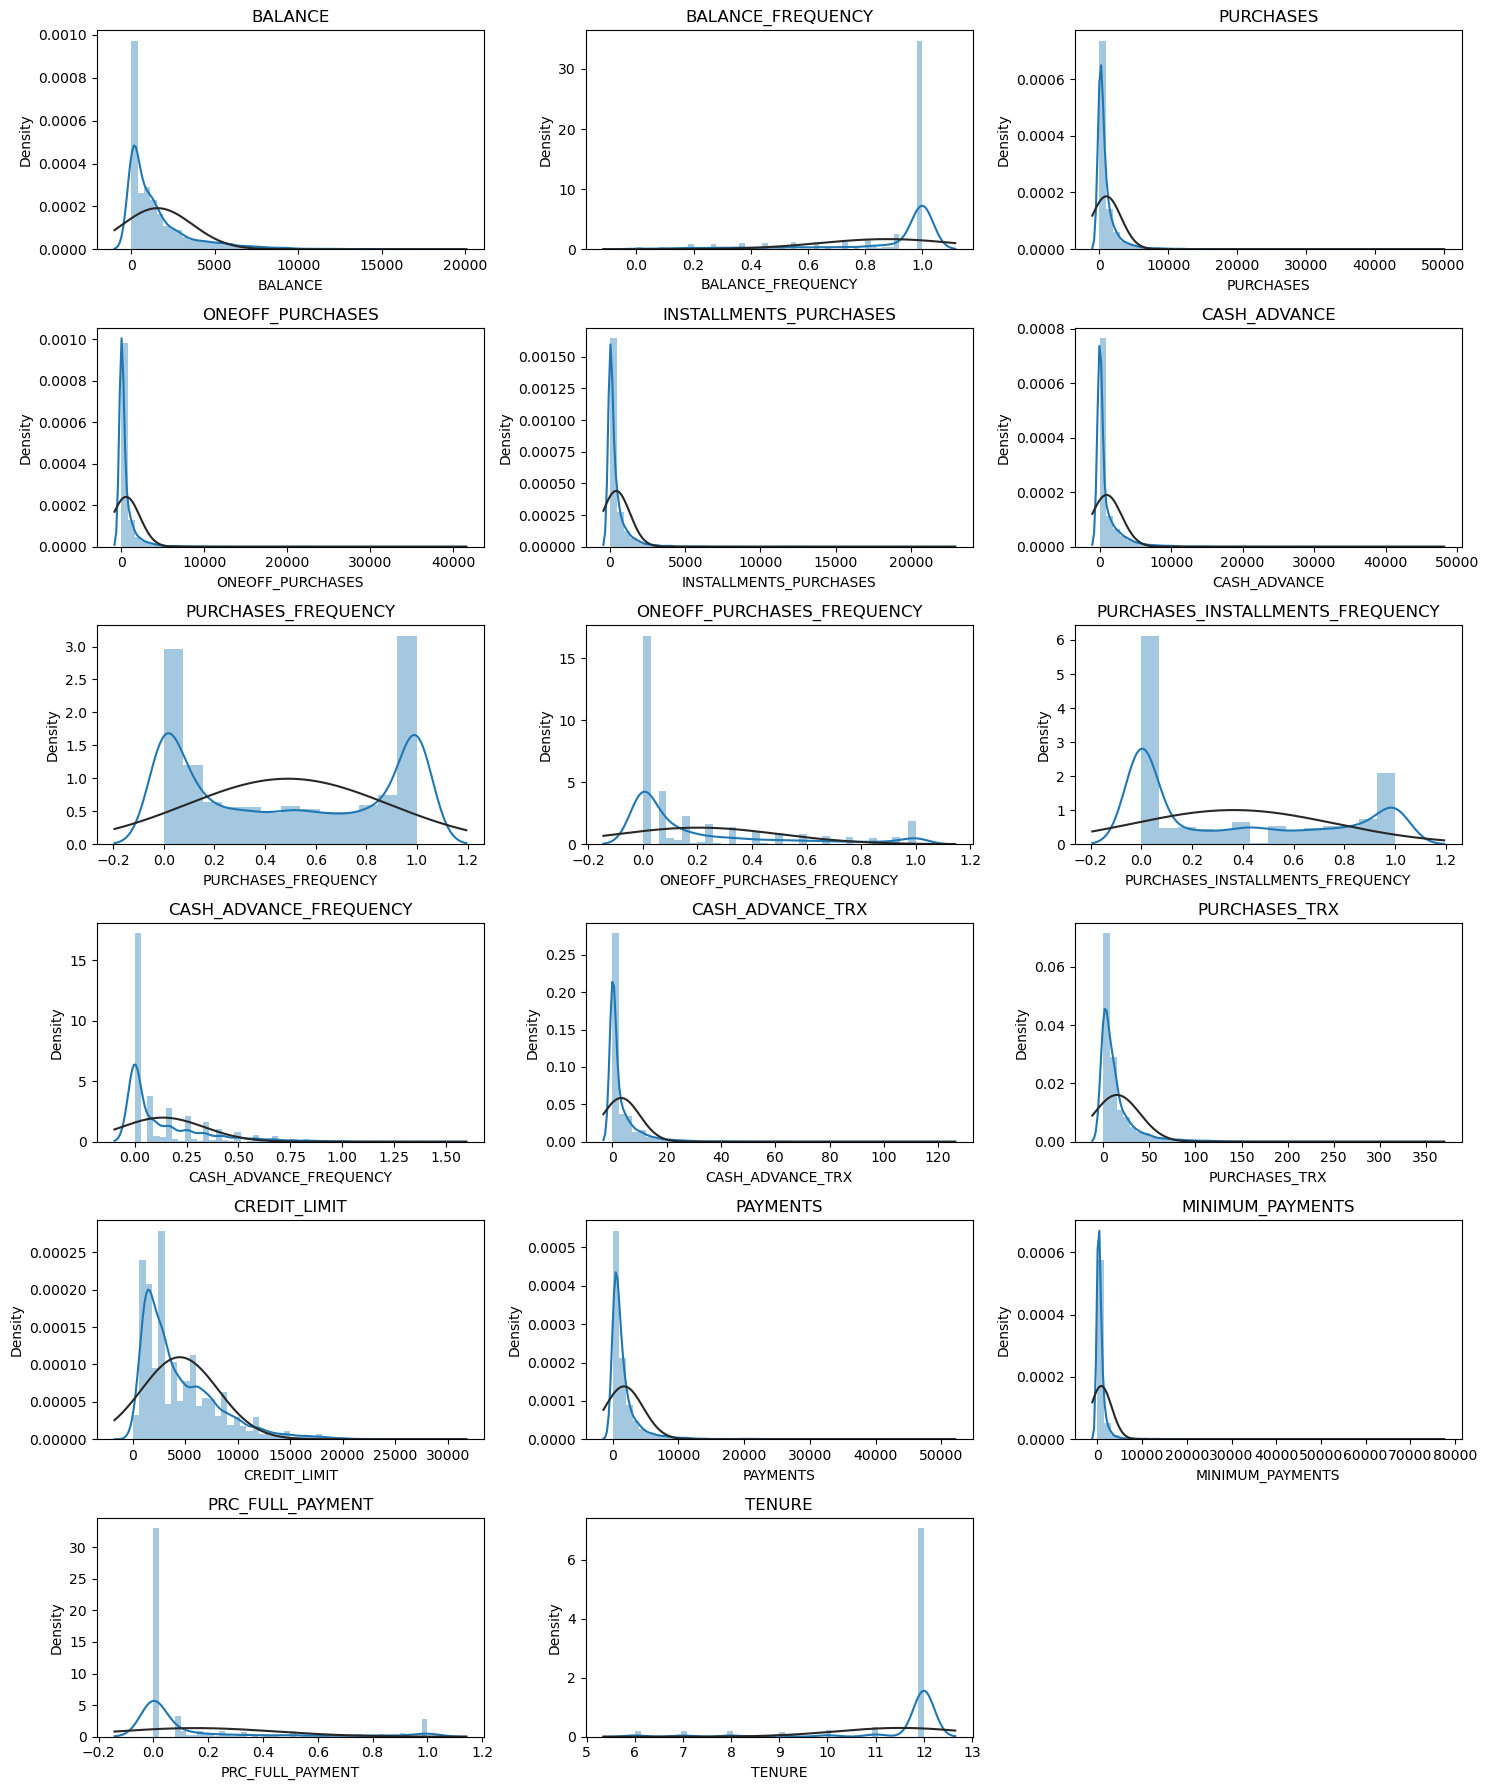

In [14]:
from scipy.stats import norm 

graph_by_variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
plt.figure(figsize=(15,18))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(df[graph_by_variables[i]].dropna(),fit=norm)
    plt.title(graph_by_variables[i])

plt.tight_layout()

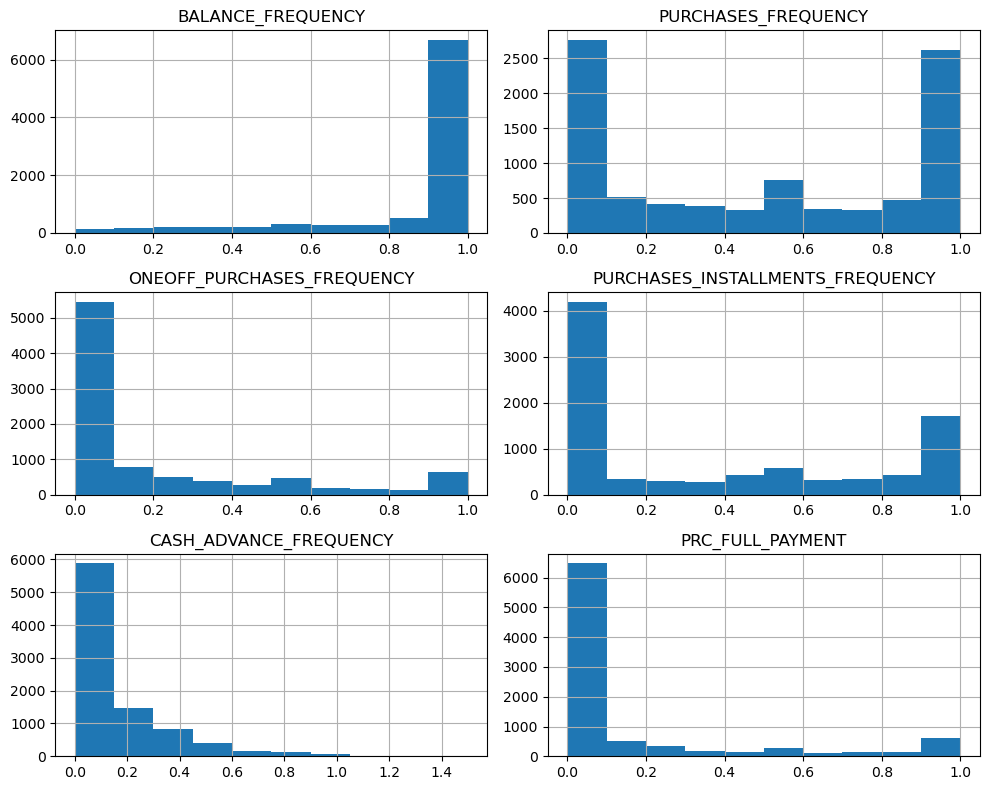

In [15]:
#Frequency variables in charts

df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].hist(figsize=(10,8))
plt.tight_layout()

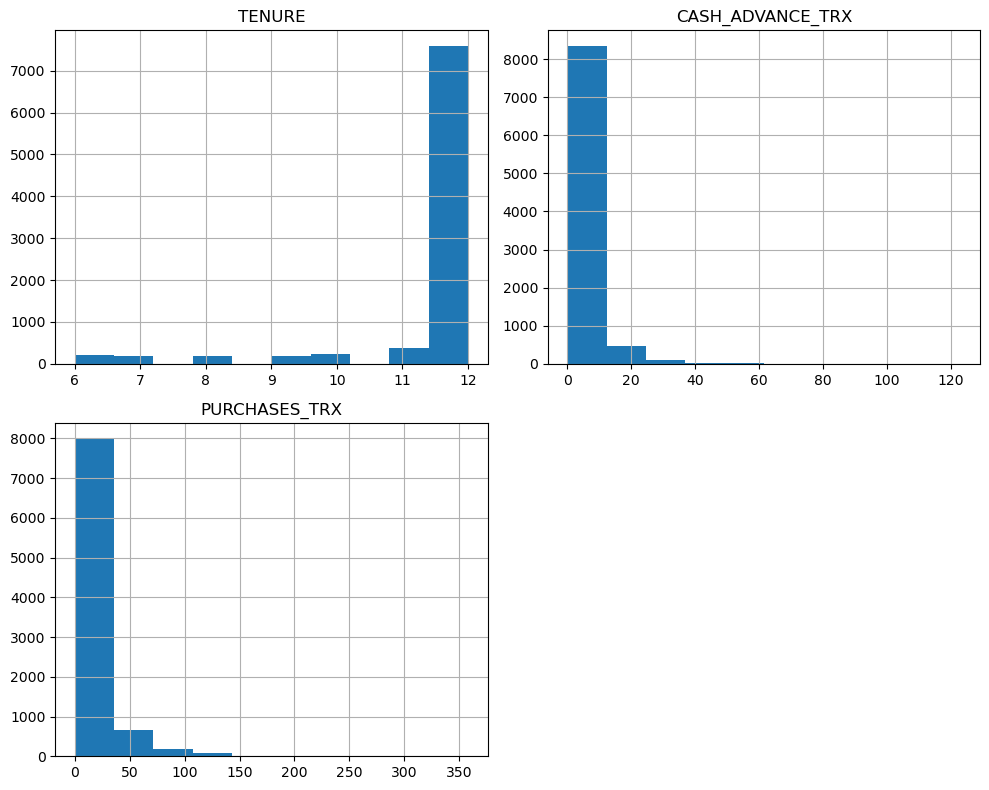

In [16]:
#int. values in histogram

df[['TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']].hist(figsize=(10,8))
plt.tight_layout()

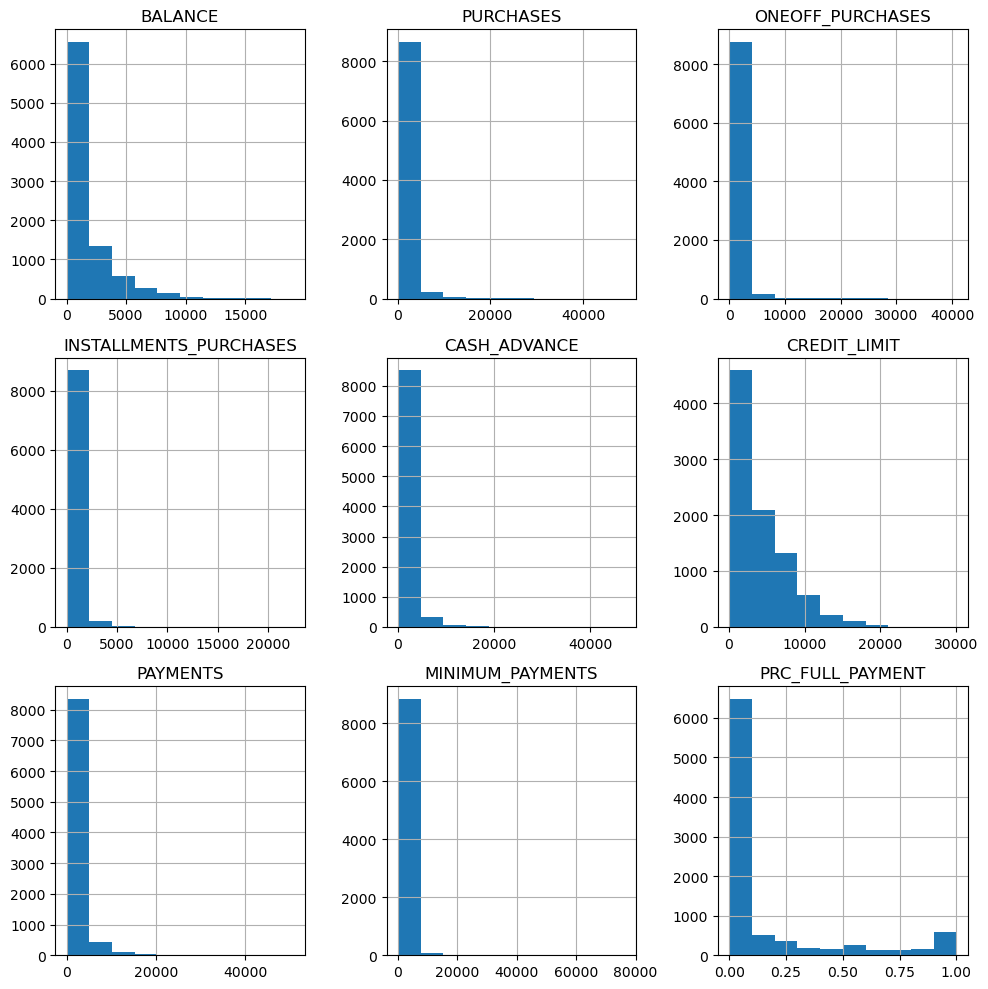

In [17]:
df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].hist(figsize=(10,10))

plt.tight_layout()

<AxesSubplot:title={'center':'Tenure'}, ylabel='Density'>

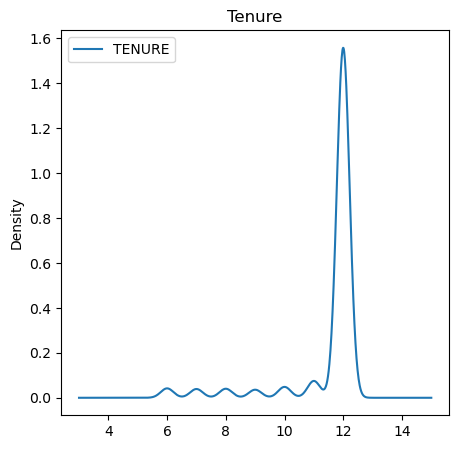

In [18]:
df[['TENURE']].plot.kde(figsize=(5,5),title='Tenure')

Text(0.5, 1.0, 'Correlation Matrix')

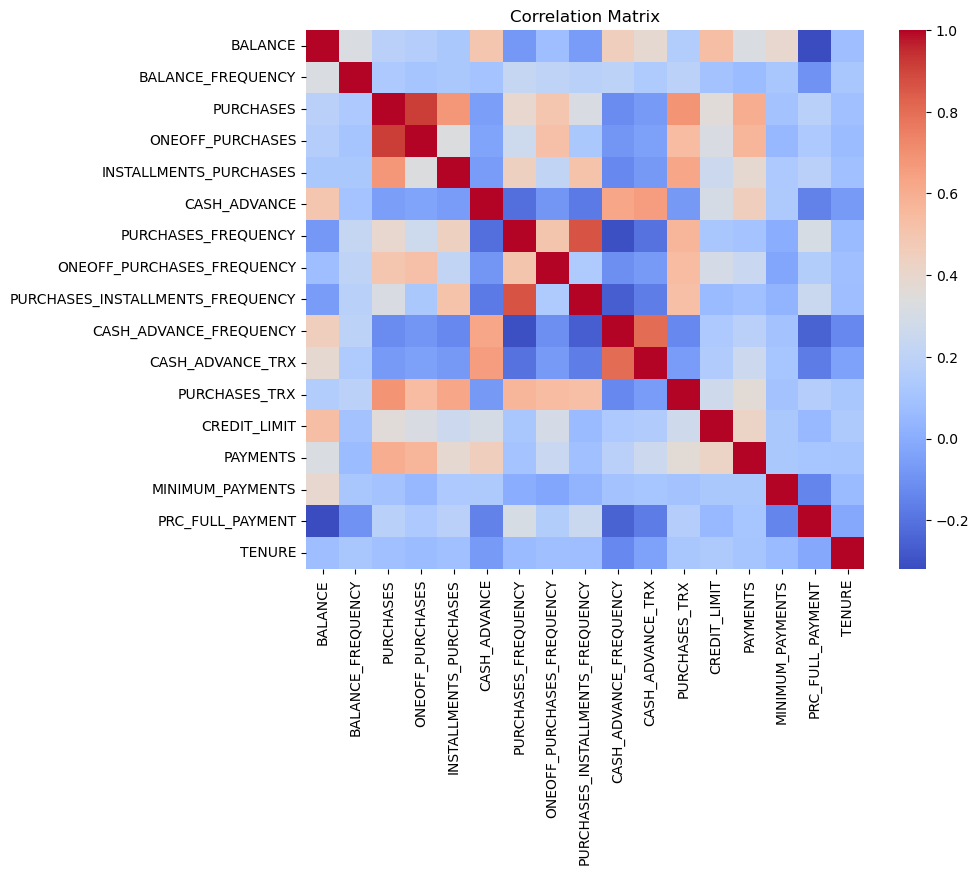

In [19]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

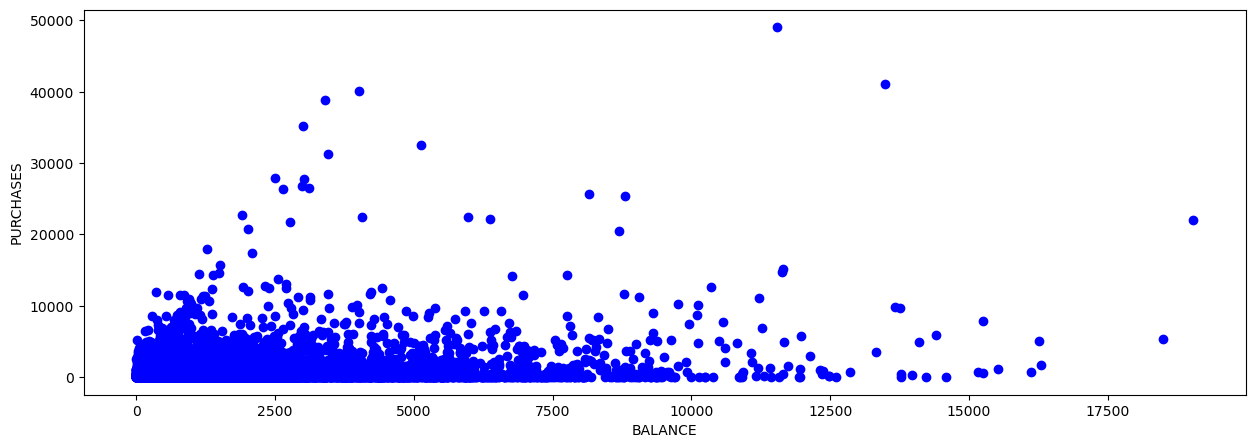

In [20]:
#PURCHASES

plt.figure(figsize = (15,5))
plt.scatter(df['BALANCE'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

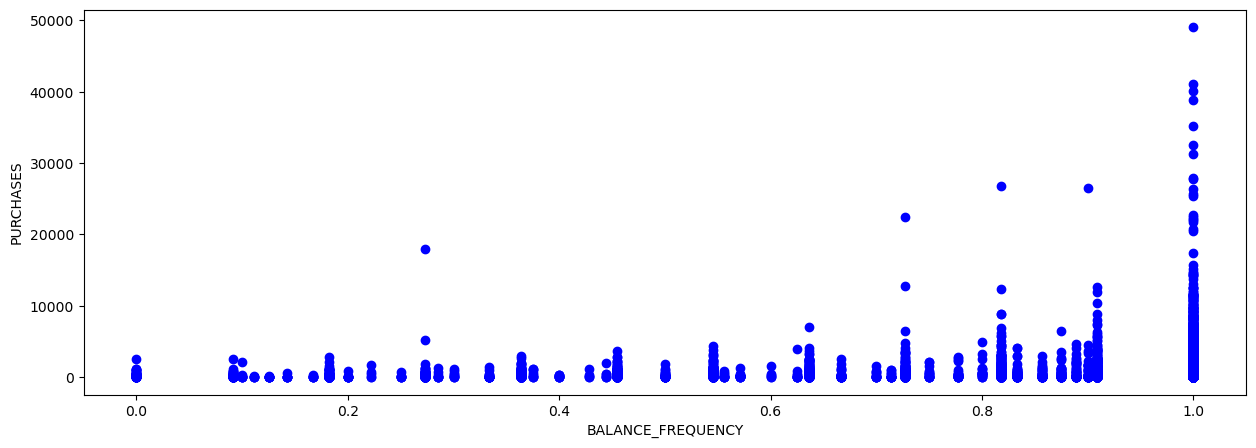

In [21]:
plt.figure(figsize = (15,5))
plt.scatter(df['BALANCE_FREQUENCY'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('PURCHASES')
plt.show()

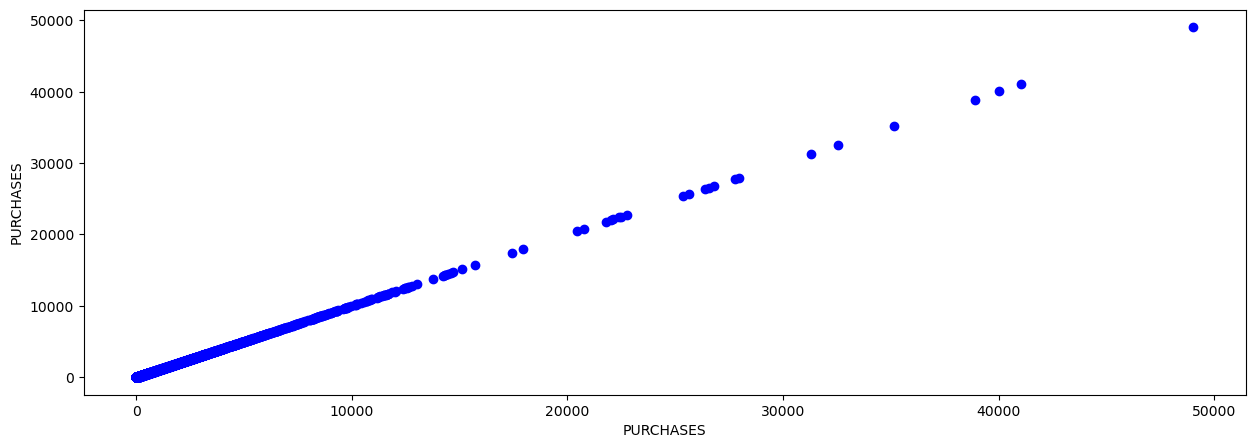

In [22]:
plt.figure(figsize = (15,5))
plt.scatter(df['PURCHASES'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES')
plt.show()

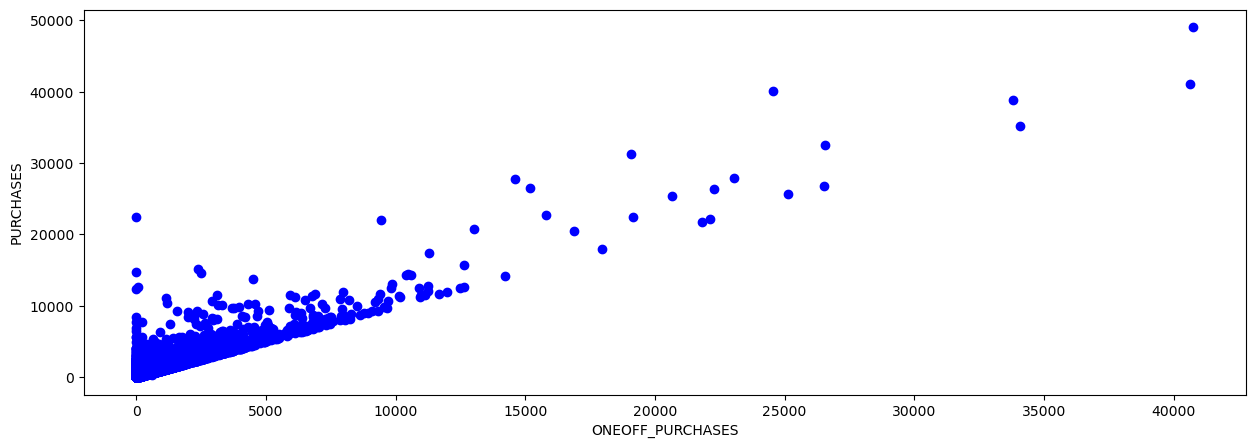

In [23]:
plt.figure(figsize = (15,5))
plt.scatter(df['ONEOFF_PURCHASES'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('PURCHASES')
plt.show()

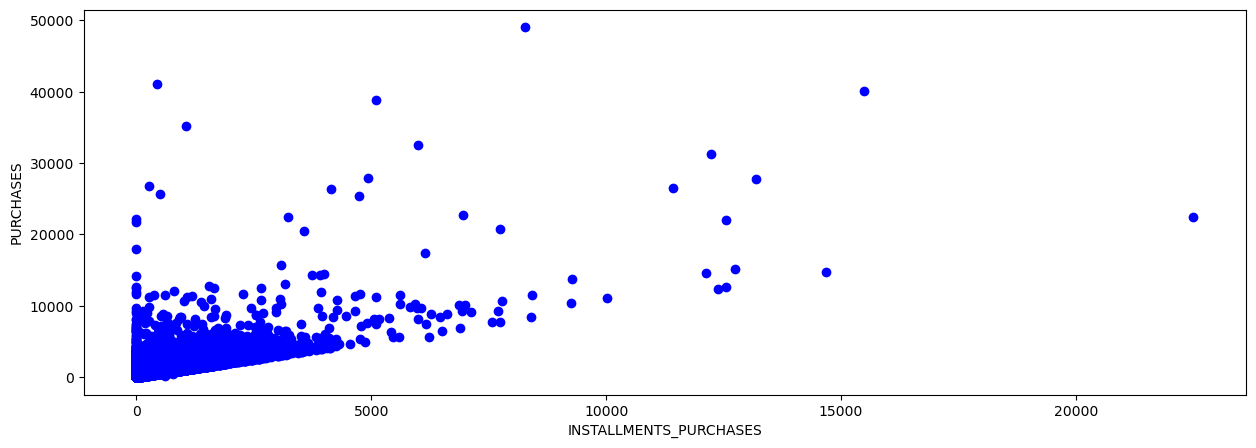

In [24]:
plt.figure(figsize = (15,5))
plt.scatter(df['INSTALLMENTS_PURCHASES'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('INSTALLMENTS_PURCHASES')
plt.ylabel('PURCHASES')
plt.show()

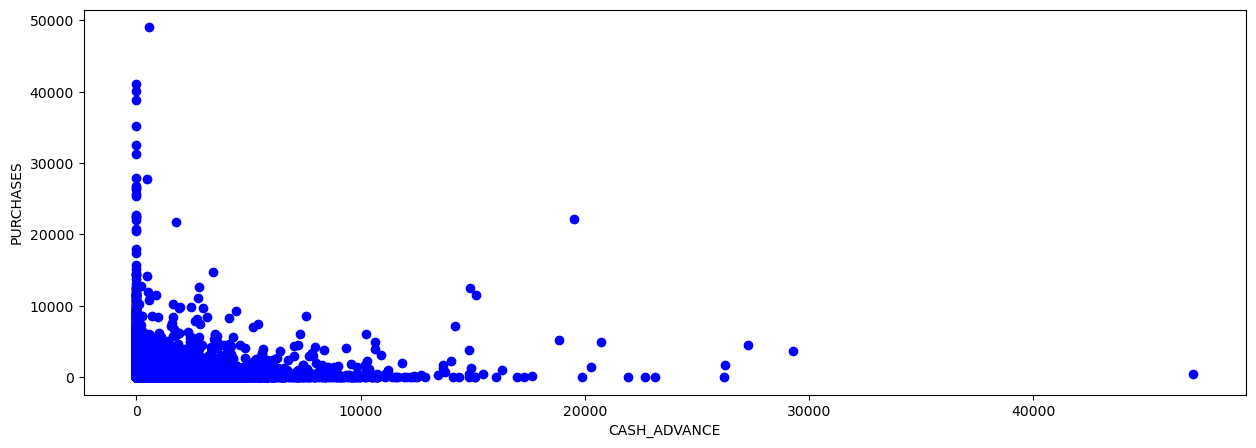

In [25]:
plt.figure(figsize = (15,5))
plt.scatter(df['CASH_ADVANCE'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('CASH_ADVANCE')
plt.ylabel('PURCHASES')
plt.show()

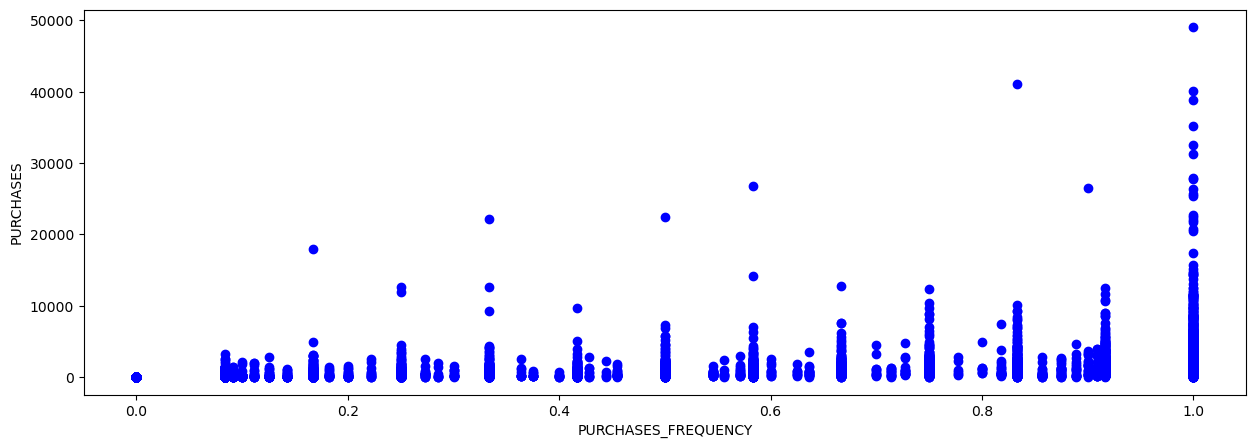

In [26]:
plt.figure(figsize = (15,5))
plt.scatter(df['PURCHASES_FREQUENCY'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('PURCHASES')
plt.show()

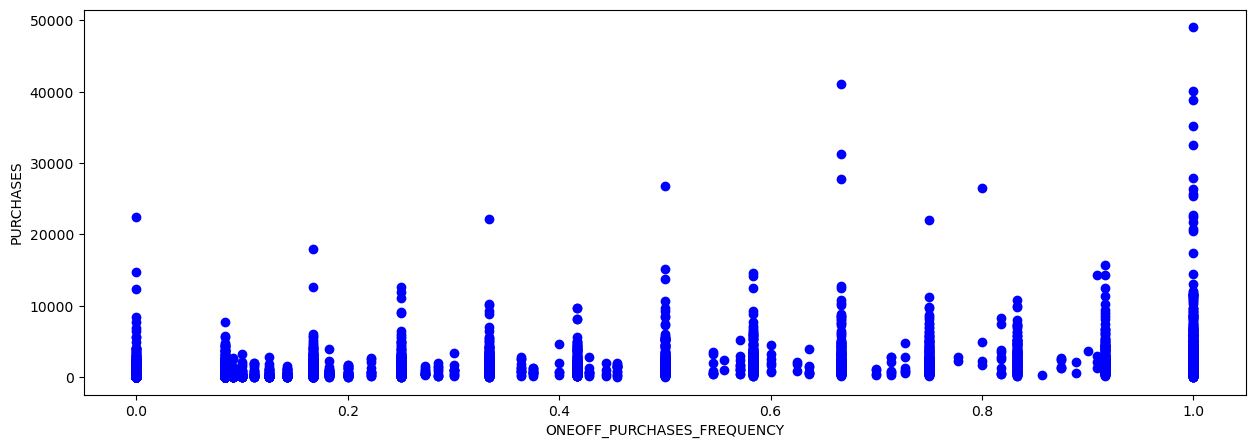

In [27]:
plt.figure(figsize = (15,5))
plt.scatter(df['ONEOFF_PURCHASES_FREQUENCY'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')
plt.ylabel('PURCHASES')
plt.show()

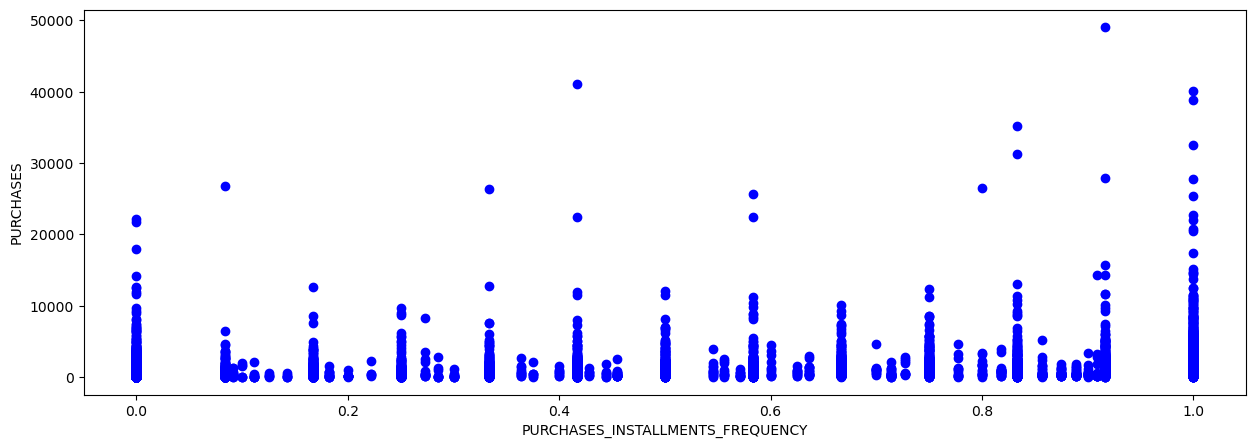

In [28]:
plt.figure(figsize = (15,5))
plt.scatter(df['PURCHASES_INSTALLMENTS_FREQUENCY'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.ylabel('PURCHASES')
plt.show()

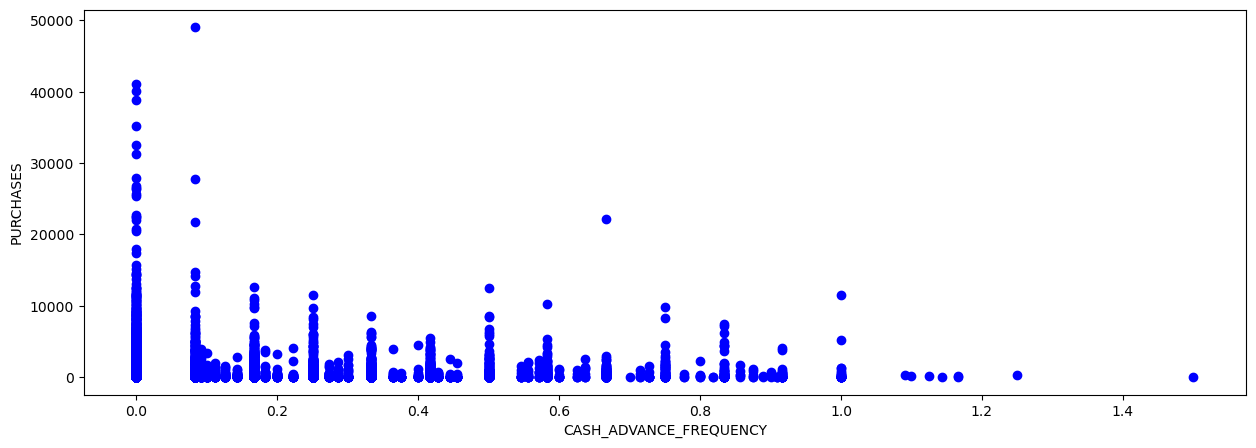

In [29]:
plt.figure(figsize = (15,5))
plt.scatter(df['CASH_ADVANCE_FREQUENCY'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('CASH_ADVANCE_FREQUENCY')
plt.ylabel('PURCHASES')
plt.show()

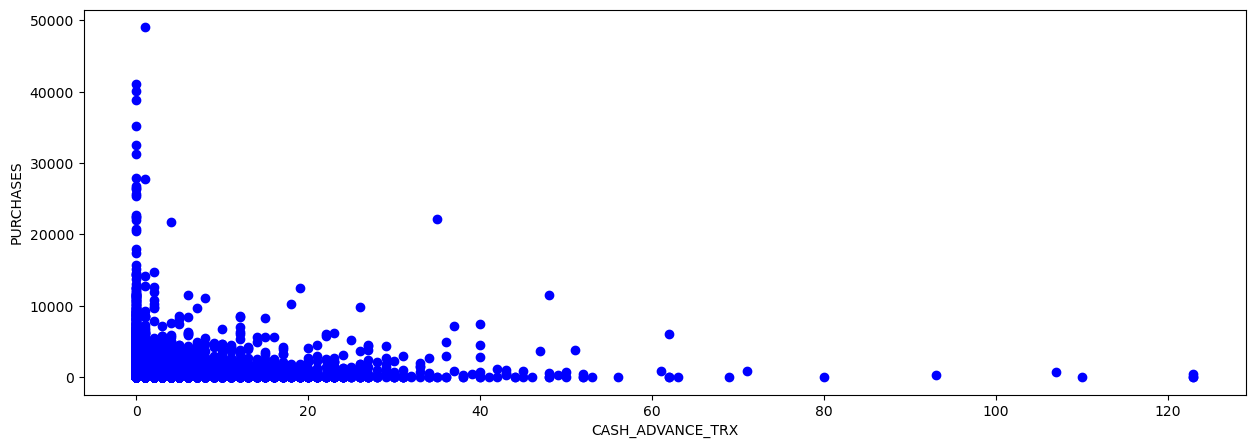

In [30]:
plt.figure(figsize = (15,5))
plt.scatter(df['CASH_ADVANCE_TRX'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('CASH_ADVANCE_TRX')
plt.ylabel('PURCHASES')
plt.show()

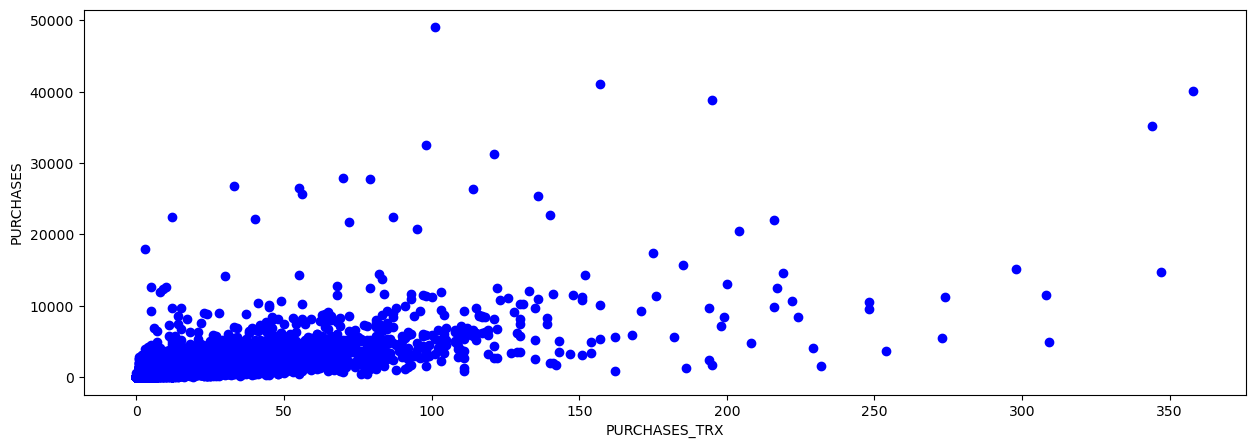

In [31]:
plt.figure(figsize = (15,5))
plt.scatter(df['PURCHASES_TRX'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('PURCHASES_TRX')
plt.ylabel('PURCHASES')
plt.show()

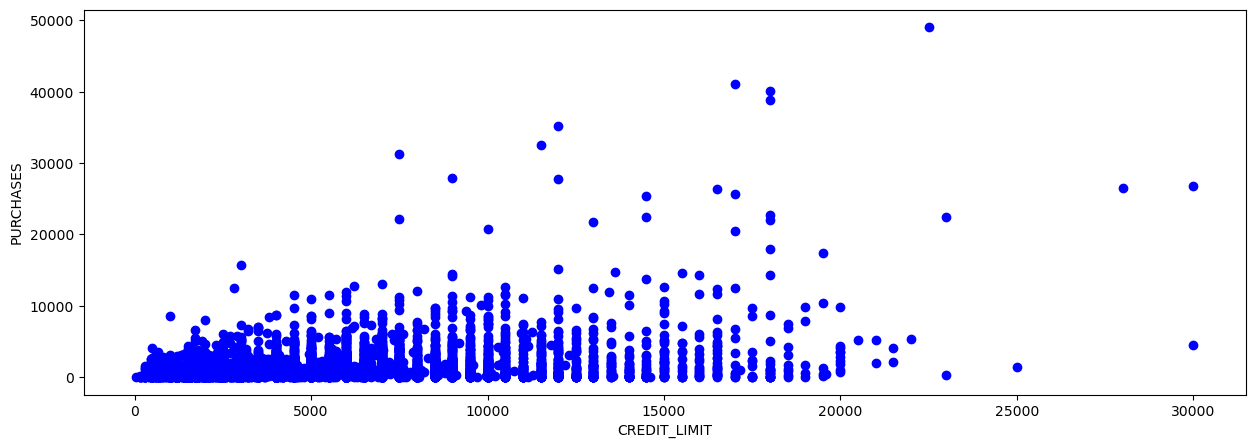

In [32]:
plt.figure(figsize = (15,5))
plt.scatter(df['CREDIT_LIMIT'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES')
plt.show()

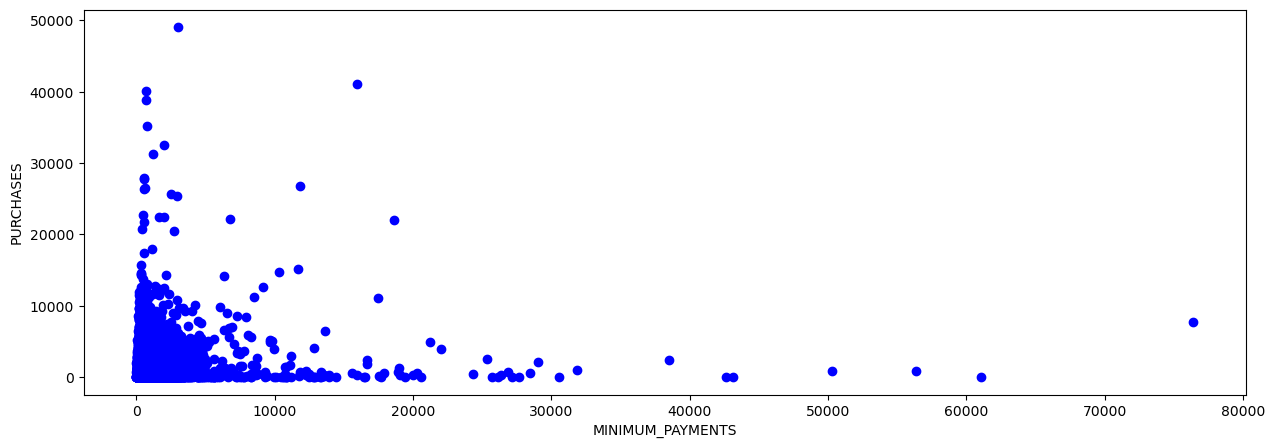

In [33]:
plt.figure(figsize = (15,5))
plt.scatter(df['MINIMUM_PAYMENTS'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('PURCHASES')
plt.show()

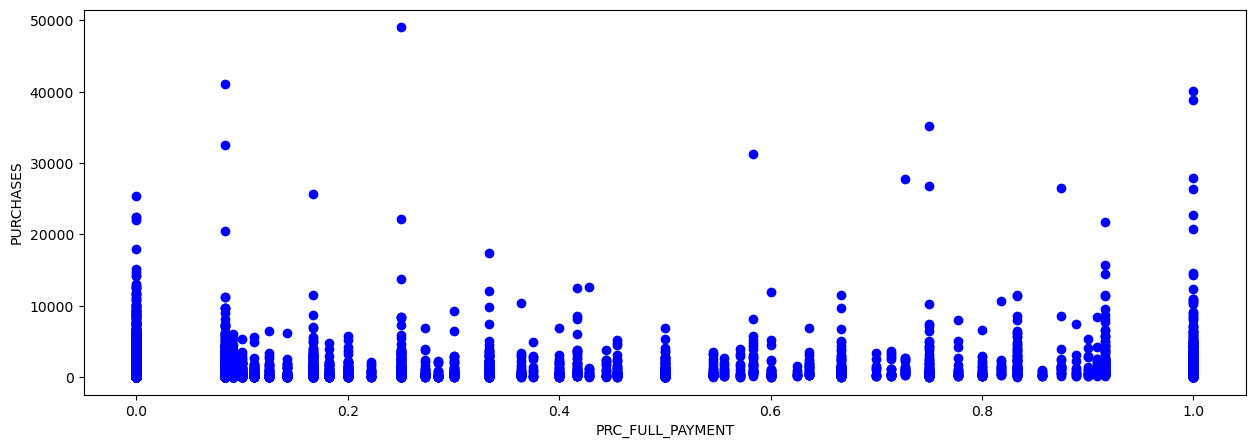

In [34]:
plt.figure(figsize = (15,5))
plt.scatter(df['PRC_FULL_PAYMENT'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('PRC_FULL_PAYMENT')
plt.ylabel('PURCHASES')
plt.show()

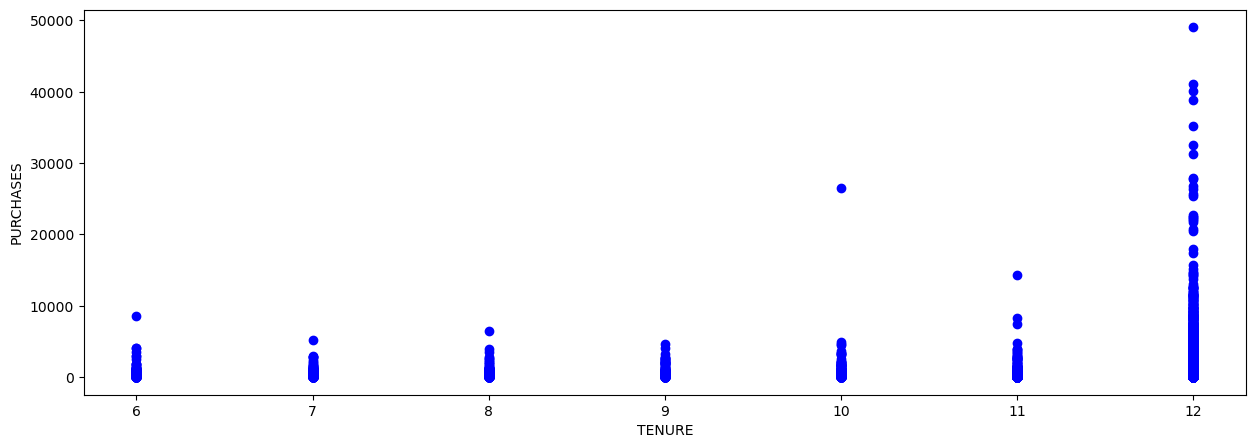

In [35]:
plt.figure(figsize = (15,5))
plt.scatter(df['TENURE'], df['PURCHASES'], color = 'blue')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('TENURE')
plt.ylabel('PURCHASES')
plt.show()

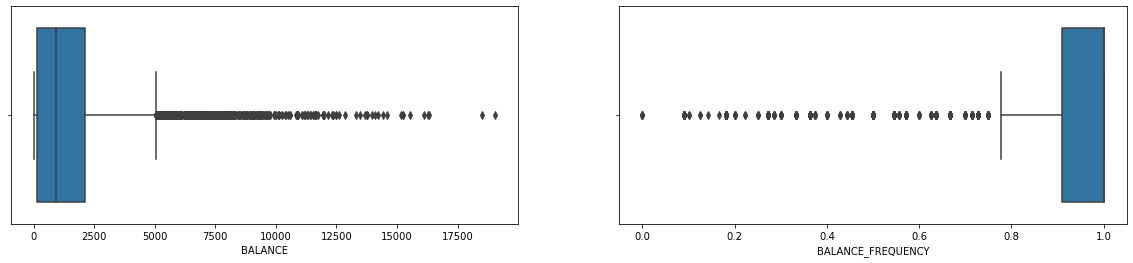

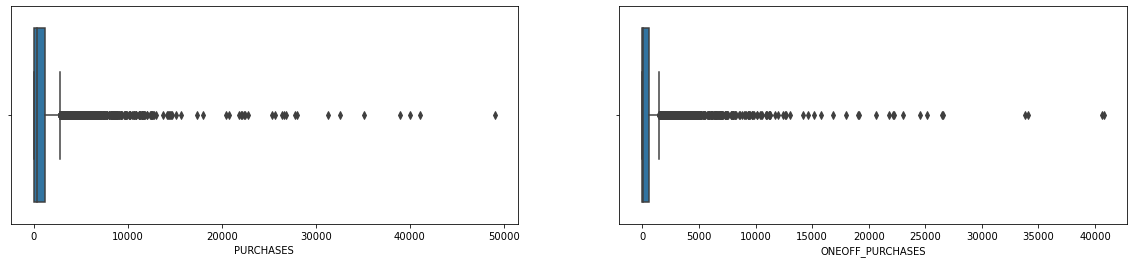

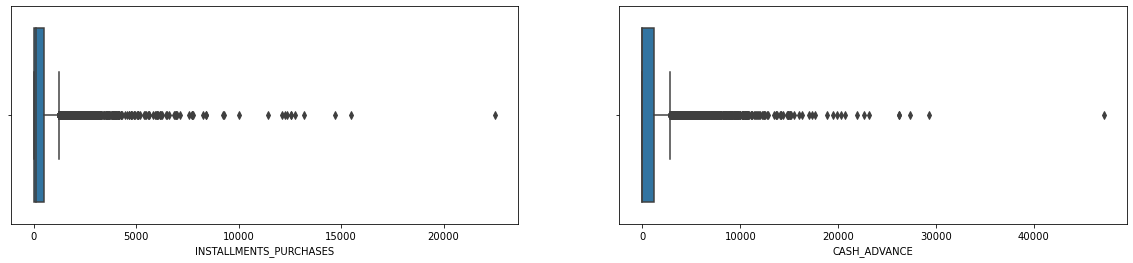

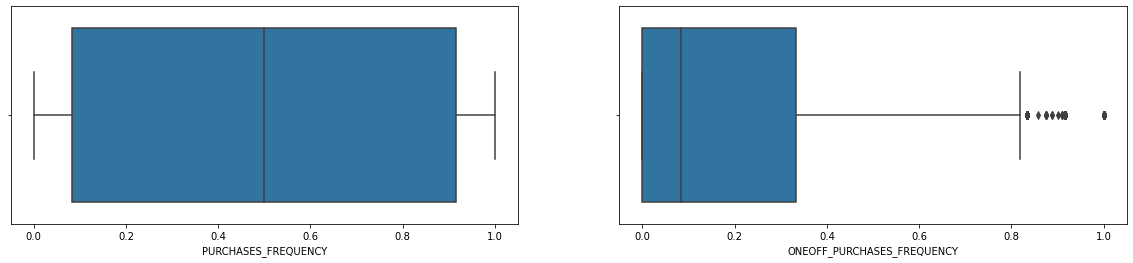

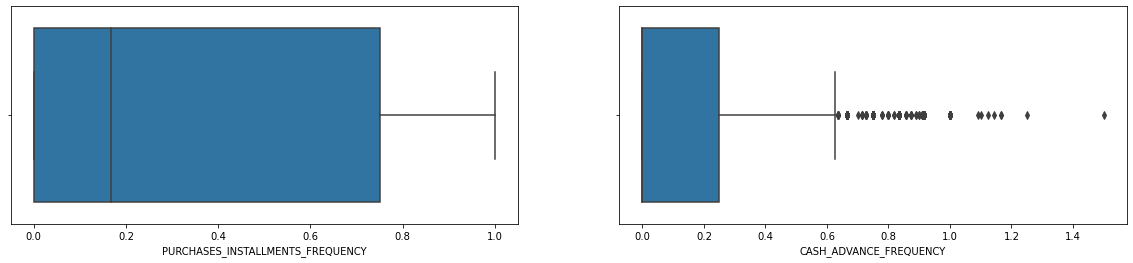

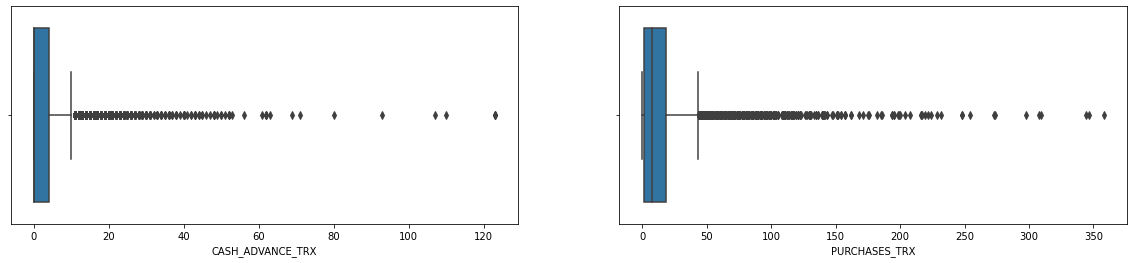

In [29]:
num = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']

i = 0
while i<6:
    fig = plt.figure(figsize = (20, 4))
    plt.subplot(1,2,1)                    # one row , 2 plot , first one
    sns.boxplot(x = num[i], data = df)
    i+=1
    plt.subplot(1,2,2)
    sns.boxplot(x = num[i], data = df)   # row one second plot
    i+=1
    plt.show()
    
num1 = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']

i = 0
while i<6:
    fig = plt.figure(figsize = (20, 4))
    plt.subplot(1,2,1)                   
    sns.boxplot(x = num1[i], data = df)
    i+=1
    plt.subplot(1,2,2)
    sns.boxplot(x = num1[i], data = df)  
    i+=1
    plt.show()
    


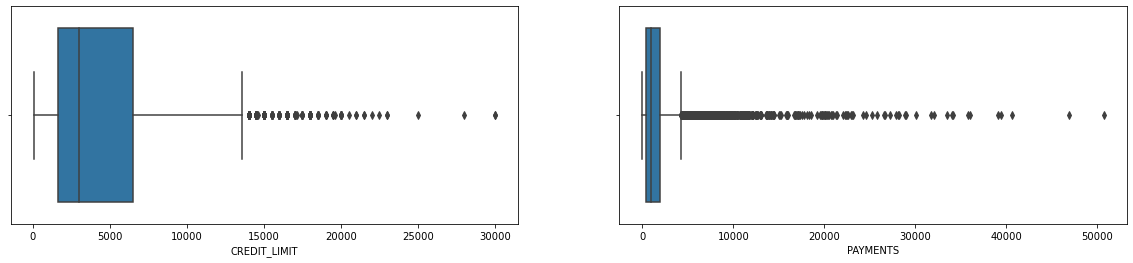

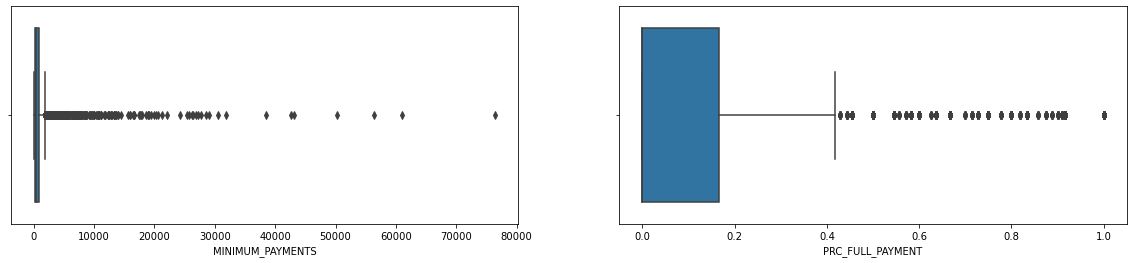

In [30]:
num2 = ['CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
    
i = 0
while i<4:
    fig = plt.figure(figsize = (20, 4))
    plt.subplot(1,2,1)                   
    sns.boxplot(x = num2[i], data = df)
    i+=1
    plt.subplot(1,2,2)
    sns.boxplot(x = num2[i], data = df)  
    i+=1
    plt.show()

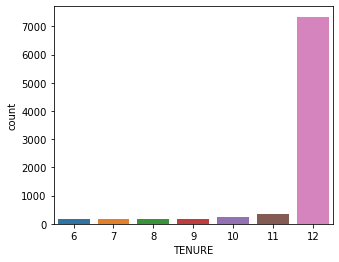

In [31]:
plt.figure(figsize = (5,4))
sns.countplot(x = df['TENURE'], data = df)
plt.show()

In [36]:
#ValueError: could not convert string to float: 'C10001'

df = df.drop(columns = ['CUST_ID'])
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
#----------------------#####  KMean  #####--------------------------#

In [16]:
kmeans_set = {"init": "random", "n_init":10, "max_iter":300, "random_state":42}

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

List = []
for k in range(1,25):
    kmeans = KMeans(n_clusters = k, **kmeans_set)
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_)

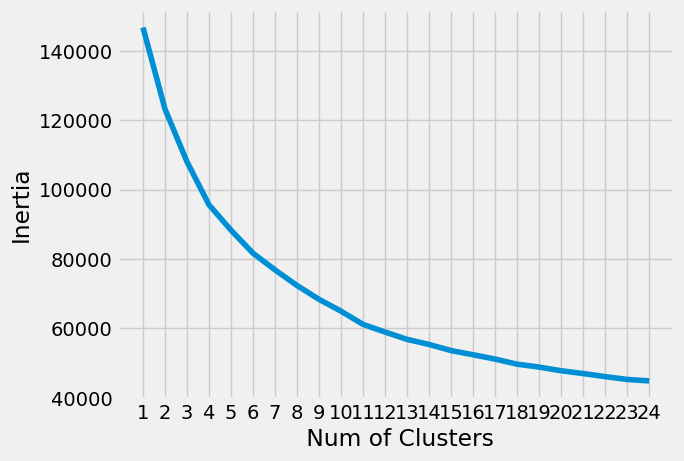

In [17]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,25), List)
plt.xticks(range(1,25))
plt.xlabel(" Num of Clusters")
plt.ylabel("Inertia")
plt.show()

In [26]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,25), List, curve = "convex", direction = "decreasing")
k1.elbow

8

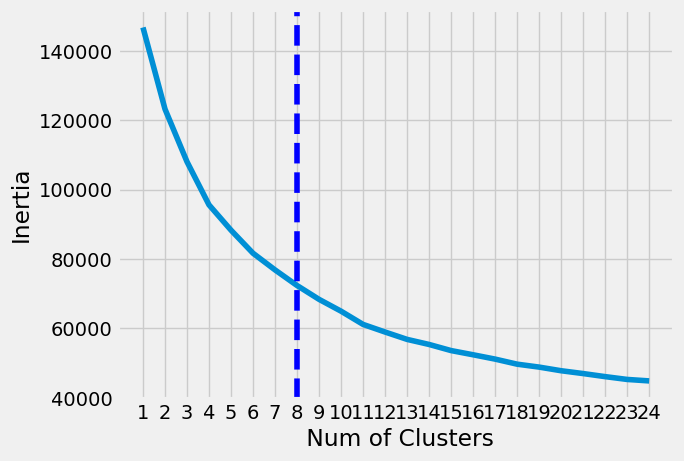

In [27]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,25), List)
plt.xticks(range(1,25))
plt.xlabel(" Num of Clusters")
plt.ylabel("Inertia")
plt.axvline(x = k1.elbow, color = 'b', label = 'axvline - full height', ls = '--')
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 8).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

[[5.64751910e+03 9.55790090e-01 1.62741561e+03 9.94660897e+02
  6.32908621e+02 2.06466017e+03 5.68493559e-01 3.36539517e-01
  4.09975632e-01 2.16995805e-01 5.38390805e+00 2.34758621e+01
  1.36017241e+04 2.60858804e+03 1.75610763e+03 1.22060340e-01
  1.18850575e+01]
 [8.06304344e+02 8.74546673e-01 5.08905373e+02 2.45931098e+02
  2.63290046e+02 4.47116198e+02 4.56827601e-01 1.32246163e-01
  3.50988094e-01 1.09691987e-01 2.23233533e+00 9.57425150e+00
  2.11084575e+03 8.89446432e+02 5.30573800e+02 1.50319972e-01
  1.13914172e+01]
 [2.43638437e+03 9.73148170e-01 6.67935370e+03 4.47287170e+03
  2.20833386e+03 5.23757246e+02 9.18013475e-01 7.02969512e-01
  7.19322877e-01 6.97717654e-02 1.87037037e+00 7.56141975e+01
  8.13641975e+03 6.60462687e+03 1.24485682e+03 3.20325802e-01
  1.19320988e+01]
 [9.04731263e+02 8.84306058e-01 1.23774425e+03 7.23330096e+02
  5.14642263e+02 2.23999261e+02 6.28284016e-01 3.36029223e-01
  4.36581360e-01 5.00414784e-02 9.43113772e-01 1.93754491e+01
  6.97966249e+03

In [30]:
kmeans.cluster_centers_

array([[5.64751910e+03, 9.55790090e-01, 1.62741561e+03, 9.94660897e+02,
        6.32908621e+02, 2.06466017e+03, 5.68493559e-01, 3.36539517e-01,
        4.09975632e-01, 2.16995805e-01, 5.38390805e+00, 2.34758621e+01,
        1.36017241e+04, 2.60858804e+03, 1.75610763e+03, 1.22060340e-01,
        1.18850575e+01],
       [8.06304344e+02, 8.74546673e-01, 5.08905373e+02, 2.45931098e+02,
        2.63290046e+02, 4.47116198e+02, 4.56827601e-01, 1.32246163e-01,
        3.50988094e-01, 1.09691987e-01, 2.23233533e+00, 9.57425150e+00,
        2.11084575e+03, 8.89446432e+02, 5.30573800e+02, 1.50319972e-01,
        1.13914172e+01],
       [2.43638437e+03, 9.73148170e-01, 6.67935370e+03, 4.47287170e+03,
        2.20833386e+03, 5.23757246e+02, 9.18013475e-01, 7.02969512e-01,
        7.19322877e-01, 6.97717654e-02, 1.87037037e+00, 7.56141975e+01,
        8.13641975e+03, 6.60462687e+03, 1.24485682e+03, 3.20325802e-01,
        1.19320988e+01],
       [9.04731263e+02, 8.84306058e-01, 1.23774425e+03, 7.233

In [31]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2,25):
    kmeans = KMeans(n_clusters = k, **kmeans_set)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

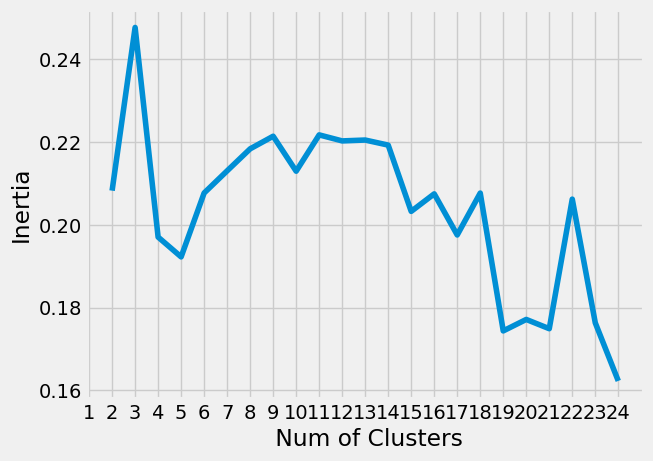

In [32]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,25), silhouette_coefficients)
plt.xticks(range(1,25))
plt.xlabel(" Num of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
#----------------------#####  DBSCAN  #####--------------------------#

In [16]:
#kmeans_set = {"init": "random", "n_init":10, "max_iter":300, "random_state":42}
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)


dbscan = DBSCAN(eps=0.3, min_samples=10).fit(df)
dbscan.fit(scaled_features)

labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print("Estimated number of clusters: %d" % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, labels))

Estimated number of clusters: 11
Silhouette Coefficient: -0.434


In [ ]:
#----------------------#####  MeanShift  #####--------------------------#

In [20]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 123


In [21]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df, labels))

Silhouette Coefficient: 0.414


In [ ]:
#---------Determining Number of Clusters with Elbow Method

In [38]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [39]:
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

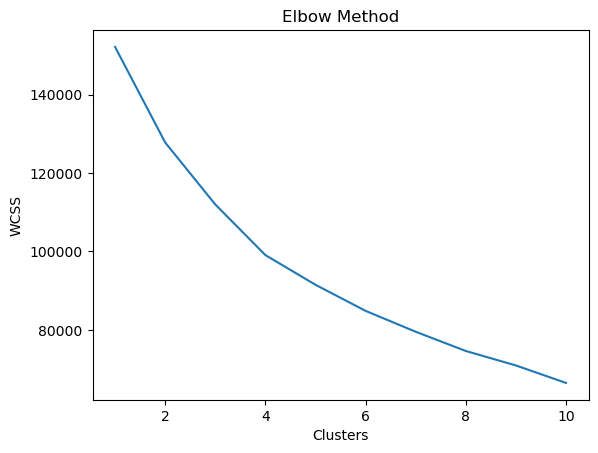

In [40]:
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()